# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---
- **Assessment criteria**
  - Graded on **both correctness and presentation**.
  - Make results easy to read: apply **string formatting**, include **plots** when useful, and **comment your code**.

- **Testing**
  - There are **no OK tests** for this assignment.
  - You are expected to **explore the data and problem**, and use a **search engine** to identify appropriate pandas functions.
  - See `veryUseful.py` for a short list of potentially helpful pandas functions.

- **Collaboration**
  - This is **group work**; consider dividing tasks.
  - Some team members can focus on the **pandas/data analysis** component, others on the **algorithmic** component.
  - **Intermediate results** are provided to **test your algorithm**; you can begin both parts immediately (see **Question 3** for details).

- **Use of generative AI**
  - **Permitted only in Part 3** of the assignment.
  - If used (or if other external sources are used) in Part 3, **clearly document how** you used them.
  - **Not allowed** in the other parts.
---


## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission
Submit your work via GitHub, following the detailed instructions provided in the assessment submission guidelines.


## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [26]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

### Q0: EDA

In [27]:
# Check mismatch between names_dict and columns of price_data
data_columns = price_data.columns.to_list()
names_list = list(names_dict.keys())

no_price_data = [comp for comp in names_list if comp not in data_columns]
no_price_data 

['CSRA', 'FTV', 'HPE', 'KHC', 'NEE', 'PYPL', 'WRK', 'WLTW']

In [28]:
# Check for Null
price_data.isna().sum().sum()

np.int64(0)

##### Remarks
- We see that there are six tickers missing from our price data.  
- No missing values

### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [29]:
# Calculate company returns in this cell
ret = price_data.pct_change().dropna()
ret.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399
2015-01-09,-0.012284,-0.010508,-0.027355,-0.001113,-0.018182,0.066901,-0.014811,-0.005089,-0.024943,-0.014612,...,-0.012285,-0.005793,-0.000927,0.012987,-0.018863,-0.010153,-0.001767,-0.014424,-0.027975,0.001584


### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [30]:
# use stack() to conver to long format
stacked_ret = ret.stack() # (date, ticker) multi-index
stacked_ret.name = "return"
stacked_ret = stacked_ret.reset_index(drop=False) # three columns (Date, level_1, return)
stacked_ret.columns = ["Date", "Ticker", "Return"]
stacked_ret.head() 

,Date,Ticker,Return
0,2015-01-05,MMM,-0.022553
1,2015-01-05,ABT,0.000223
2,2015-01-05,ABBV,-0.018819
3,2015-01-05,ACN,-0.016884
4,2015-01-05,ATVI,-0.013910


In [31]:
# Top 10 daily returns
stacked_ret.nlargest(10, 'Return')

,Date,Ticker,Return
81044,2015-08-27,FCX,0.286616
58018,2015-06-22,WMB,0.258999
97657,2015-10-14,TRIP,0.255361
8646,2015-01-29,HAR,0.237600
106015,2015-11-06,QRVO,0.232254
93733,2015-10-02,WYNN,0.228389
13833,2015-02-12,TRIP,0.224915
49829,2015-05-29,HUM,0.203128
99952,2015-10-21,KLAC,0.187895
32088,2015-04-08,PRGO,0.183899


In [32]:
# Bottom 10 daily returns
stacked_ret.nsmallest(10, 'Return')

,Date,Ticker,Return
98577,2015-10-16,PWR,-0.285006
48903,2015-05-27,KORS,-0.241954
69013,2015-07-24,BIIB,-0.220802
101099,2015-10-23,SRCL,-0.192767
95228,2015-10-07,YUM,-0.188324
10769,2015-02-04,RL,-0.182169
59817,2015-06-26,MU,-0.181515
115399,2015-12-04,NRG,-0.179581
106423,2015-11-09,MNK,-0.169981
102190,2015-10-28,AKAM,-0.167306


### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [33]:
# Convert index to DatetimeIndex for resampling
yearly_ret = ret.copy()
yearly_ret = 1 + yearly_ret # change to gross ret
yearly_ret.index = pd.to_datetime(ret.index)
yearly_ret = yearly_ret.resample("YE").apply(np.prod) # take product to get cumulative returns over a year and then subtract by 1
yearly_ret = yearly_ret - 1 # get yearly returns
yearly_ret.head()

C:\Users\jayju\AppData\Local\Temp\ipykernel_23356\616700546.py:5: FutureWarning: The provided callable <function prod at 0x000001BE47134D60> is currently using DatetimeIndexResampler.prod. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "prod" instead.
  yearly_ret = yearly_ret.resample("YE").apply(np.prod) # take product to get cumulative returns over a year and then subtract by 1


,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.057624,0.02144,-0.071393,0.201626,0.942684,0.676443,0.29859,-0.049328,-0.278381,0.229282,...,0.032695,-0.207025,0.108464,0.159639,-0.026044,-0.337054,0.032109,-0.081229,-0.027638,0.114511


In [34]:
# melt to get long form
yearly_ret_long = yearly_ret.reset_index().melt(id_vars = "Date", value_name= "Yearly Return", var_name="Ticker")
yearly_ret_long.head()

,Date,Ticker,Yearly Return
0,2015-12-31,MMM,-0.057624
1,2015-12-31,ABT,0.021440
2,2015-12-31,ABBV,-0.071393
3,2015-12-31,ACN,0.201626
4,2015-12-31,ATVI,0.942684


In [35]:
# 10 highest yearly returns
yearly_ret_long.nlargest(10, "Yearly Return")

,Date,Ticker,Yearly Return
313,2015-12-31,NFLX,1.294549
27,2015-12-31,AMZN,1.190750
4,2015-12-31,ATVI,0.942684
5,2015-12-31,AYI,0.676443
329,2015-12-31,NVDA,0.664514
207,2015-12-31,GPN,0.600933
226,2015-12-31,HRL,0.559016
175,2015-12-31,EXR,0.544469
463,2015-12-31,VRSN,0.527540
378,2015-12-31,RAI,0.497837


In [36]:
# 10 smallest yearly returns
yearly_ret_long.nsmallest(10, "Yearly Return")

,Date,Ticker,Yearly Return
96,2015-12-31,CHK,-0.769785
403,2015-12-31,SWN,-0.738314
196,2015-12-31,FCX,-0.703792
255,2015-12-31,KMI,-0.632032
297,2015-12-31,MU,-0.592518
327,2015-12-31,NRG,-0.559234
371,2015-12-31,RRC,-0.553864
280,2015-12-31,MRO,-0.546383
307,2015-12-31,MUR,-0.538541
485,2015-12-31,WYNN,-0.516602


### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

In [37]:
# We assume serial independence to annualize daily standard deviation by multiplying sqrt(251)
yearly_vol = ret.std() * np.sqrt(251) # 251 business days in 2015
yearly_vol.name = "yearly volatility"

# 10 highest yearly volatilities
yearly_vol.reset_index().nlargest(10, "yearly volatility")

,index,yearly volatility
196,FCX,0.698220
96,CHK,0.677823
440,RIG,0.594958
403,SWN,0.557654
485,WYNN,0.553204
367,QRVO,0.530311
279,MNK,0.516055
482,WMB,0.510519
371,RRC,0.509703
313,NFLX,0.506578


In [38]:
# 10 lowest yearly volatilities
yearly_vol.reset_index().nsmallest(10, "yearly volatility")

,index,yearly volatility
427,KO,0.143584
100,CHD,0.152069
49,AJG,0.153846
342,PEP,0.153878
426,CLX,0.154073
130,DVA,0.156568
51,T,0.157528
465,VZ,0.157622
377,RSG,0.158002
359,PG,0.160107


### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [39]:
# Your code here
ret_corr = ret.corr()
ret_corr.head() # Show section of correlation matrix

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598666,0.322637,0.632059,0.418550,0.450897,0.468755,0.257132,0.335378,0.317374,...,0.409630,0.499817,0.507630,0.543733,0.623741,0.316706,0.356204,0.433634,0.486263,0.293897
ABT,0.598666,1.000000,0.483669,0.644081,0.434370,0.494315,0.585671,0.371080,0.450213,0.464380,...,0.453393,0.538242,0.507487,0.619810,0.567309,0.376226,0.388070,0.640907,0.512479,0.463925
ABBV,0.322637,0.483669,1.000000,0.318051,0.226868,0.269096,0.347337,0.292497,0.303990,0.419365,...,0.261256,0.291590,0.323337,0.267436,0.321926,0.307020,0.289728,0.508626,0.323670,0.406247
ACN,0.632059,0.644081,0.318051,1.000000,0.462545,0.481296,0.560759,0.303227,0.395830,0.401335,...,0.388994,0.531886,0.510191,0.563153,0.615349,0.431369,0.353528,0.461188,0.546654,0.414050
ATVI,0.418550,0.434370,0.226868,0.462545,1.000000,0.310464,0.482777,0.223484,0.198134,0.285121,...,0.295291,0.369757,0.398586,0.388827,0.397004,0.365900,0.330467,0.370687,0.346790,0.323141


### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [40]:
# Your code here
def n_correlated_companies(corr_df : pd.DataFrame, ticker : str, n : int) -> list:
    """
    Parameters:
        corr_df : pd.DataFrame
            N x N correlation matrix, where N is number of assets
        ticker : str
            ticker of company that we wish to analyze
        n : int
            number of companies most and least correlated to the target company
    
    Returns:
        A list that contains two lists. 
            First list contains n tuples of form (ticker, correlation) corresponding to the most correlated companies
            Second list contains n tuples of form (ticker, correlation) corresponding to the least correlated companies
    """
    # Convert correlation matrix to long format
    corr_long = corr_df.reset_index().melt(id_vars = "index", value_name = "corr", var_name="ticker")
    n_largest = corr_long.query(f"index == '{ticker}' and ticker != '{ticker}'").nlargest(n, "corr")
    n_smallest = corr_long.query(f"index == '{ticker}' and ticker != '{ticker}'").nsmallest(n, "corr")

    n_largest_list = []
    n_smallest_list = []
    for index, row in n_largest.iterrows():
        top_corr = (row["ticker"], row["corr"])
        n_largest_list.append(top_corr)
    
    for index, row in n_smallest.iterrows():
        bottom_corr = (row["ticker"], row["corr"])
        n_smallest_list.append(bottom_corr)
    
    output = [n_largest_list, n_smallest_list]
    
    return output

def print_topn_bottomn(corr_df : pd.DataFrame, ticker : str, n : int):
    """
    Print results in pretty format
    """
    output = n_correlated_companies(corr_df= corr_df, ticker = ticker, n = n)
    for i in range(2):
        if i == 0: # top n
            for j in range(n):
                print(f"Top {j+1} correlated stock is {output[i][j][0]}")
        elif i == 1: # bottom n
            for j in range(n):
                print(f"Bottom {j+1} correlated stock is {output[i][j][0]}")

# Print top 10 and bottom 10 correlated stocks for google
print_topn_bottomn(corr_df= ret_corr, ticker = "GOOG", n = 10)

Top 1 correlated stock is GOOGL
Top 2 correlated stock is AMZN
Top 3 correlated stock is FB
Top 4 correlated stock is PGR
Top 5 correlated stock is MSFT
Top 6 correlated stock is MA
Top 7 correlated stock is SBUX
Top 8 correlated stock is HON
Top 9 correlated stock is HSIC
Top 10 correlated stock is FISV
Bottom 1 correlated stock is SRCL
Bottom 2 correlated stock is RIG
Bottom 3 correlated stock is DO
Bottom 4 correlated stock is RRC
Bottom 5 correlated stock is URBN
Bottom 6 correlated stock is SWN
Bottom 7 correlated stock is NEM
Bottom 8 correlated stock is CHK
Bottom 9 correlated stock is NRG
Bottom 10 correlated stock is DISCA


In [41]:
# Take a look at company , correlation pair

# Google
n_correlated_companies(corr_df= ret_corr, ticker = "GOOG", n = 5)

[[('GOOGL', 0.9893650403946367),
  ('AMZN', 0.584337165609492),
  ('FB', 0.5692559103219069),
  ('PGR', 0.5479131307967529),
  ('MSFT', 0.5205625110597928)],
 [('SRCL', 0.017148943478535007),
  ('RIG', 0.023043978286836898),
  ('DO', 0.0537338137664369),
  ('RRC', 0.05677426433704295),
  ('URBN', 0.06746135962666808)]]

In [42]:
# Facebook
n_correlated_companies(corr_df= ret_corr, ticker = "FB", n = 5)

[[('FISV', 0.6196667113100133),
  ('MA', 0.6176586356768465),
  ('SBUX', 0.5981902921801381),
  ('GOOGL', 0.5865476662500515),
  ('TSS', 0.580213738241196)],
 [('NEM', -0.0028322700162479162),
  ('RIG', 0.013326555431120768),
  ('SWN', 0.047666560515331115),
  ('DO', 0.05430954181927569),
  ('CHK', 0.0586821027529903)]]

In [43]:
# Amazon
n_correlated_companies(corr_df= ret_corr, ticker = "AMZN", n = 5)

[[('GOOGL', 0.5855531323602523),
  ('GOOG', 0.584337165609492),
  ('SBUX', 0.5719510377436501),
  ('V', 0.5607044028255768),
  ('MA', 0.5387081334232423)],
 [('SRCL', 0.05645061795663578),
  ('RIG', 0.06016160897555293),
  ('SWN', 0.08237627406253434),
  ('TRIP', 0.08768372088400926),
  ('WFM', 0.0906999068867834)]]

In [44]:
# Microsoft
n_correlated_companies(corr_df= ret_corr, ticker = "MSFT", n = 5)

[[('MMC', 0.60454888315055),
  ('PG', 0.6042044450605105),
  ('MA', 0.5908862934433519),
  ('ADP', 0.5894447396591711),
  ('SBUX', 0.5837047838609107)],
 [('SRCL', 0.028886760198836244),
  ('NRG', 0.09076139667518143),
  ('RIG', 0.11378517777722416),
  ('SWN', 0.11478651315424668),
  ('URBN', 0.1287878682452084)]]

In [45]:
# Apple
n_correlated_companies(corr_df= ret_corr, ticker = "AAPL", n = 5)

[[('ITW', 0.6012654342849203),
  ('NOC', 0.589367776986826),
  ('HON', 0.5767295014864411),
  ('FISV', 0.5739352682800534),
  ('SWKS', 0.5733498437510143)],
 [('RRC', 0.1127108755839607),
  ('CMG', 0.1305011854095386),
  ('NEM', 0.14371255009668252),
  ('RIG', 0.14404457195308107),
  ('SWN', 0.1468105388053012)]]

##### Remarks
- It is hard to say the result was expected except for Google. The top three correlated stocks in 2015 were all tech stocks, which is quite an intuitive result.
- However, Facebook displayed stock correlation with Mastercard and Fiserv, which are both financial services company that are involved in the payments industry. 
- We also see Starbucks being included in the top five correlated stocks for three of the five tech stocks. This may indicate that there were common factors driving the returns for the tech stocks and Starbucks (consumer discretionary).
- Interestingly, in 2015, four out of the top five correlated stocks with Microsoft are all not tech stocks (except for Automatic Data Processing). This indicates that our intuition may not always hold.
- Similarly, Apple's top three correlated stocks in 2015 were all Industrial stocks, indicating that Apple may have behaved more like an Industrial stock for that period.

## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [46]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edges = create_correlation_list(correl = ret_corr)

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [47]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(np.float64(0.598666164029738), 'MMM', 'ABT'),
 (np.float64(0.32263699601940254), 'MMM', 'ABBV'),
 (np.float64(0.6320593488560189), 'MMM', 'ACN'),
 (np.float64(0.41855006701119907), 'MMM', 'ATVI'),
 (np.float64(0.4508974957132859), 'MMM', 'AYI'),
 (np.float64(0.4687548443045165), 'MMM', 'ADBE'),
 (np.float64(0.25713165217544326), 'MMM', 'AAP'),
 (np.float64(0.33537796741224424), 'MMM', 'AES'),
 (np.float64(0.31737374099675925), 'MMM', 'AET'),
 (np.float64(0.5059306055816828), 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [48]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    while next_nodes[node] != node:
        node = next_nodes[node]
    return node


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    assert node1 != node2, "Input different nodes"
    # Find clusters corresponding to node1 and node2
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)
    
    # Case 1: if two nodes have same bottom, they are already in same cluster. do nothing.
    if bottom1 == bottom2:
        return
    
    # Case 2: if two nodes have differing bottoms, they are in different clusters. Merge.
    else:
        next_nodes[bottom1] = bottom2 # Connect bottom1 to bottom2
        # remove bottom node from set_starters (only when starter_node == bottom_node, i.e., single set cluster)
        set_starters.discard(bottom2)  # discard doesn't raise any keyerror even if bottom node is not in set_starters
        
    
    
def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edges, key = lambda s: s[0])
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        # get highest corr, along with starting node and ending node (pop from list)
        triple = sorted_edges.pop()
        corr = triple[0]
        source = triple[1]
        destination = triple[2]

        merge_sets(source, destination, next_nodes, set_starters)
        
        
    return set_starters, next_nodes

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [49]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

# run algo
set_starters, next_nodes = cluster_correlations(edges, firms, k = 200) 
all_clusters = construct_sets(set_starters,next_nodes)

In [50]:
all_clusters

{'CTXS': {'CTXS'},
 'AES': {'AES'},
 'SPG': {'AIV',
  'AVB',
  'BXP',
  'EQR',
  'ESS',
  'FRT',
  'GGP',
  'KIM',
  'SLG',
  'SPG',
  'UDR',
  'VNO'},
 'FB': {'FB'},
 'EA': {'EA'},
 'BSX': {'BSX'},
 'PBI': {'PBI'},
 'BIIB': {'BIIB'},
 'RCL': {'RCL'},
 'WAT': {'WAT'},
 'AMP': {'AMP'},
 'FFIV': {'FFIV'},
 'CINF': {'CINF'},
 'STJ': {'STJ'},
 'PG': {'PG'},
 'GLW': {'GLW'},
 'FLS': {'FLS'},
 'ATVI': {'ATVI'},
 'HAS': {'HAS'},
 'MSFT': {'MSFT'},
 'NEM': {'NEM'},
 'HPQ': {'HPQ'},
 'AKAM': {'AKAM'},
 'FAST': {'FAST'},
 'DD': {'DD'},
 'PCG': {'AEE',
  'AEP',
  'CMS',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'LNT',
  'PCG',
  'PNW',
  'SCG',
  'SO',
  'WEC',
  'XEL'},
 'COH': {'COH'},
 'PEP': {'PEP'},
 'LM': {'LM'},
 'URI': {'URI'},
 'WHR': {'WHR'},
 'EW': {'EW'},
 'IRM': {'IRM'},
 'FLR': {'FLR'},
 'GIS': {'GIS'},
 'HUM': {'HUM'},
 'SHW': {'SHW'},
 'XEC': {'XEC'},
 'AMT': {'AMT'},
 'DPS': {'DPS'},
 'M': {'M'},
 'ADP': {'ADP'},
 'FISV': {'FISV'},
 'O': {'O'},
 'ULTA': {'ULTA'},
 'ACN'

In [51]:
# Sanity check: confirm that within cluster stocks have high correlation with each other
test_cluster = list(all_clusters["PCG"])
ret_corr.loc[test_cluster, test_cluster]

,CMS,LNT,AEP,ES,PNW,DUK,XEL,D,WEC,PCG,ED,SO,DTE,AEE,EIX,SCG
CMS,1.000000,0.871166,0.866104,0.884472,0.871274,0.852370,0.908582,0.844955,0.895592,0.843531,0.838944,0.834962,0.917447,0.865751,0.820737,0.880851
LNT,0.871166,1.000000,0.873191,0.875428,0.863054,0.832042,0.874108,0.832979,0.861913,0.802615,0.832106,0.843403,0.873250,0.894195,0.784032,0.863754
AEP,0.866104,0.873191,1.000000,0.876456,0.874326,0.862135,0.887959,0.858405,0.863816,0.820468,0.839004,0.858048,0.890412,0.853375,0.817336,0.852436
ES,0.884472,0.875428,0.876456,1.000000,0.874244,0.852520,0.899818,0.846337,0.885898,0.814006,0.843795,0.849333,0.893180,0.876894,0.826124,0.876109
PNW,0.871274,0.863054,0.874326,0.874244,1.000000,0.829312,0.894365,0.824202,0.866847,0.822056,0.862533,0.842254,0.890975,0.863681,0.796317,0.870393
DUK,0.852370,0.832042,0.862135,0.852520,0.829312,1.000000,0.846478,0.832862,0.846176,0.794259,0.826042,0.885128,0.878369,0.820549,0.792344,0.847252
XEL,0.908582,0.874108,0.887959,0.899818,0.894365,0.846478,1.000000,0.848827,0.890647,0.834803,0.860675,0.853196,0.905672,0.877466,0.842257,0.879547
D,0.844955,0.832979,0.858405,0.846337,0.824202,0.832862,0.848827,1.000000,0.837148,0.782313,0.805463,0.832962,0.878233,0.839890,0.771612,0.846348
WEC,0.895592,0.861913,0.863816,0.885898,0.866847,0.846176,0.890647,0.837148,1.000000,0.827918,0.873550,0.852549,0.899696,0.858439,0.817700,0.882744
PCG,0.843531,0.802615,0.820468,0.814006,0.822056,0.794259,0.834803,0.782313,0.827918,1.000000,0.806779,0.796801,0.846831,0.801712,0.810876,0.827542


### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

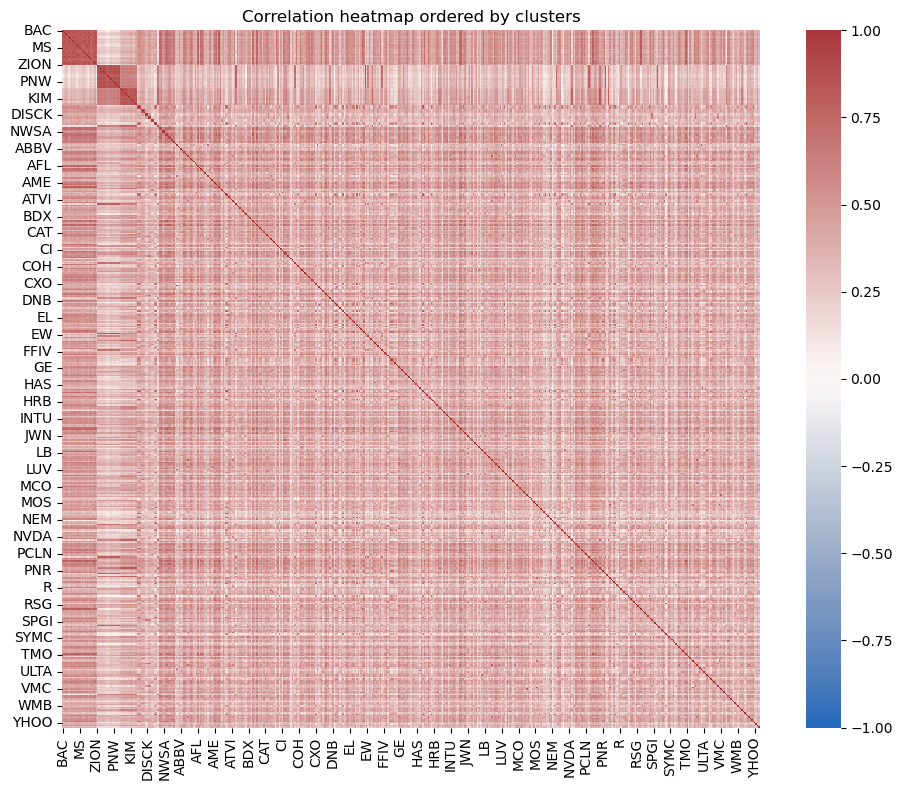

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Build a label per name + an ordering
labels = {}
for cid, (_, members) in enumerate(sorted(all_clusters.items(), key=lambda kv: (-len(kv[1]), kv[0]))):
    for n in sorted(members):
        labels[n] = cid

order = sorted(labels, key=lambda n: (labels[n], n))
corr_reordered = ret_corr.loc[order, order]

plt.figure(figsize=(10,8))
sns.heatmap(corr_reordered, vmin=-1, vmax=1, cmap="vlag", center=0, square=True)
plt.title("Correlation heatmap ordered by clusters")
plt.tight_layout()


c:\Users\jayju\miniconda3\envs\quant\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jayju\miniconda3\envs\quant\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~

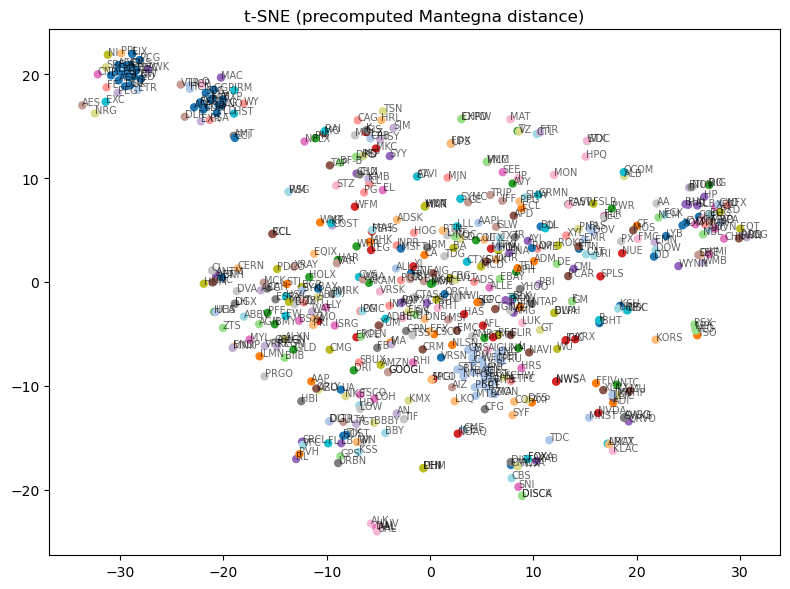

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ret_corr: (n x n) correlation matrix indexed by tickers
C = ret_corr.values
D = np.sqrt(np.maximum(0, 2*(1 - C)))  # Mantegna distance; symmetric, nonneg, diag 0

n = D.shape[0]
perp = min(30, n - 2)  # t-SNE requires perplexity < n_samples

tsne = TSNE(
    n_components=2,
    metric="precomputed",
    init="random",          # <-- key fix
    perplexity=perp,
    random_state=0,
    learning_rate="auto"
)
Y = tsne.fit_transform(D)

# color points by your cluster assignment (from your union-find result)
# suppose all_clusters is {root: set_of_names}; build label per ticker in ret_corr.index
root_to_id = {r:i for i, r in enumerate(all_clusters)}
labels_by_name = {}
for r, members in all_clusters.items():
    for name in members:
        labels_by_name[name] = root_to_id[r]
colors = [labels_by_name[name] for name in ret_corr.index]

plt.figure(figsize=(8,6))
plt.scatter(Y[:,0], Y[:,1], c=colors, s=25, cmap="tab20")
for i, name in enumerate(ret_corr.index):
    plt.annotate(name, (Y[i,0], Y[i,1]), fontsize=7, alpha=0.6)
plt.title("t-SNE (precomputed Mantegna distance)")
plt.tight_layout()
plt.show()


## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

You may use generative AI such as chatGPT to help with this part of the assignment (but not the other parts).

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

## All done!

Make sure to follow submission guidelines.